# 8. Neural Networks with Toy example

In [1]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 8.1 Generate Data

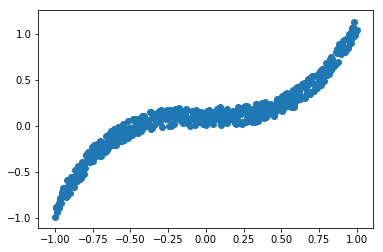

In [3]:
x = torch.linspace(-1, 1, 500)
y = x.pow(3) + 0.2*torch.rand(x.size())

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [4]:
x.shape, y.shape

(torch.Size([500]), torch.Size([500]))

In [5]:
x = torch.unsqueeze(x, dim=1)
y = torch.unsqueeze(y, dim=1)

## 8.2 Define Model

In [6]:
hidden1 = nn.Linear(1, 10, bias=True)
# activation1 = nn.ReLU()

hidden2 = nn.Linear(10, 20, bias=True)
# activation2 = nn.ReLU()

hidden3 = nn.Linear(20, 10, bias=True)
# activation3 = nn.ReLU()

output = nn.Linear(10, 1, bias=True)

In [7]:
model = nn.Sequential(
    hidden1, 
    hidden2, 
    hidden3, 
    output
)

In [8]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

## 8.3 Train Model

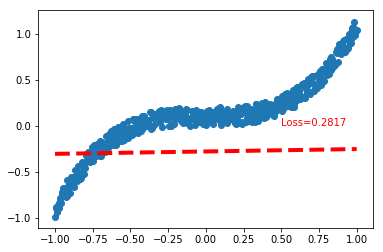

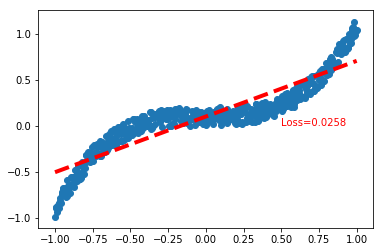

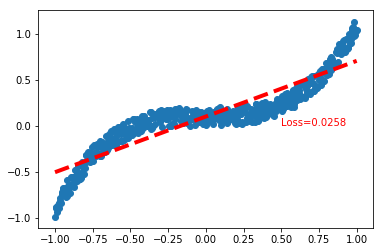

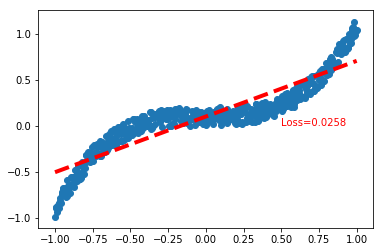

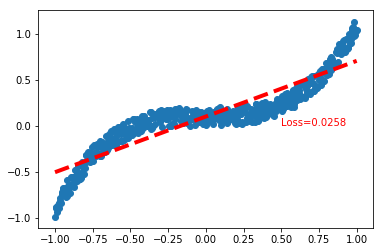

In [9]:
for step in range(2000):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 400  == 0:
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pre.data.numpy(), 'r--', lw=4)
        plt.text(0.5, 0, 'Loss=%.4f' % cost.item(), fontdict={'size':10, 'color':'red'})
        plt.show()